In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('problem_2_train.csv')

In [3]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


# Data Cleaning of Test and  Training Set

### Converting Date values

In [4]:
datatest= pd.read_csv('problem_2_test.csv')

In [5]:
datatest.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [6]:
data['memcreateddate'] = pd.to_datetime(data.memcreateddate)
data['memcreatemonth'] = data['memcreateddate'].apply(lambda x: x.month)

data['mobilepurchasedate'] = pd.to_datetime(data.mobilepurchasedate)
data['mobilepurchasemonth'] = data['mobilepurchasedate'].apply(lambda x: x.month)

data['claimintdate'] = pd.to_datetime(data.claimintdate)
data['claimintmonth'] = data['claimintdate'].apply(lambda x: x.month)

data['pickupStartdate'] = pd.to_datetime(data.pickupStartdate)
data['pickupStartmonth'] = data['pickupStartdate'].apply(lambda x: x.month)

data.drop(columns=['memcreateddate', 'mobilepurchasedate', 'claimintdate', 'pickupStartdate'], inplace=True)

In [7]:
data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'servicecntrid', 'tat_in_days',
       'memcreatemonth', 'mobilepurchasemonth', 'claimintmonth',
       'pickupStartmonth'],
      dtype='object')

# Handling Categorical Values and dummy variables

In [8]:
claimtype = pd.get_dummies(data.claimtype, prefix='claimtpye', drop_first=True)
custpincodecategory = pd.get_dummies(data.custpincodecategory, prefix='custpincodecategory', drop_first=True)
data.drop(columns=['claimtype', 'custpincodecategory'], inplace=True)
data = pd.concat([data, claimtype, custpincodecategory], axis=1)

### Scaling values

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid', 'memcreatemonth', 'mobilepurchasemonth','claimintmonth', 'pickupStartmonth']] = scaler.fit_transform(data[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid', 'memcreatemonth', 'mobilepurchasemonth','claimintmonth', 'pickupStartmonth']])

# Data Cleaning For Testing Data

In [10]:
datatest = pd.read_csv('problem_2_test.csv')

datatest['memcreateddate'] = pd.to_datetime(datatest.memcreateddate)
datatest['memcreatemonth'] = datatest['memcreateddate'].apply(lambda x: x.month)

datatest['mobilepurchasedate'] = pd.to_datetime(datatest.mobilepurchasedate)
datatest['mobilepurchasemonth'] = datatest['mobilepurchasedate'].apply(lambda x: x.month)

datatest['claimintdate'] = pd.to_datetime(datatest.claimintdate)
datatest['claimintmonth'] = datatest['claimintdate'].apply(lambda x: x.month)

datatest['pickupStartdate'] = pd.to_datetime(datatest.pickupStartdate)
datatest['pickupStartmonth'] = datatest['pickupStartdate'].apply(lambda x: x.month)

datatest.drop(columns=['memcreateddate', 'mobilepurchasedate', 'claimintdate', 'pickupStartdate'], inplace=True)

In [11]:
claimtype = pd.get_dummies(datatest.claimtype, prefix='claimtpye', drop_first=True)
custpincodecategory = pd.get_dummies(datatest.custpincodecategory, prefix='custpincodecategory', drop_first=True)
datatest.drop(columns=['claimtype', 'custpincodecategory'], inplace=True)
datatest = pd.concat([datatest, claimtype, custpincodecategory], axis=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datatest[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid', 'memcreatemonth', 'mobilepurchasemonth','claimintmonth', 'pickupStartmonth']] = scaler.fit_transform(datatest[['hubid', 'hubpincode', 'pickuppartnerid','deliverypartnerid', 'insuranceCompanyId', 'custpincode','servicecntrid', 'memcreatemonth', 'mobilepurchasemonth','claimintmonth', 'pickupStartmonth']])

In [13]:
datatest.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,memcreatemonth,mobilepurchasemonth,claimintmonth,pickupStartmonth,claimtpye_EW,custpincodecategory_A,custpincodecategory_B,custpincodecategory_C,custpincodecategory_D
0,2829088,AN,0.076923,0.652181,0.756494,0.95102,0.0,0.654998,0.403339,0.545455,0.545455,0.333333,0.0,0,1,0,0,0
1,2829866,AJ,0.038462,0.000004,0.756494,0.95102,1.0,0.128679,0.333919,0.545455,0.000000,0.333333,0.0,0,1,0,0,0
2,2894489,AJ,0.076923,0.652181,0.756494,0.95102,1.0,0.689989,0.397188,0.000000,0.000000,0.333333,0.0,0,0,0,1,0
3,2876708,AJ,0.038462,0.000004,0.756494,0.95102,1.0,0.292490,0.333919,0.636364,0.363636,0.333333,0.0,0,0,1,0,0
4,2890283,AN,0.807692,0.420427,0.756494,0.95102,0.0,0.580046,0.503515,0.909091,0.727273,0.333333,0.0,0,0,0,1,0


In [14]:
XnewTest = datatest.drop(columns=['srno', 'mobmake'])

In [15]:
XnewTest.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,memcreatemonth,mobilepurchasemonth,claimintmonth,pickupStartmonth,claimtpye_EW,custpincodecategory_A,custpincodecategory_B,custpincodecategory_C,custpincodecategory_D
0,0.076923,0.652181,0.756494,0.95102,0.0,0.654998,0.403339,0.545455,0.545455,0.333333,0.0,0,1,0,0,0
1,0.038462,0.000004,0.756494,0.95102,1.0,0.128679,0.333919,0.545455,0.000000,0.333333,0.0,0,1,0,0,0
2,0.076923,0.652181,0.756494,0.95102,1.0,0.689989,0.397188,0.000000,0.000000,0.333333,0.0,0,0,0,1,0
3,0.038462,0.000004,0.756494,0.95102,1.0,0.292490,0.333919,0.636364,0.363636,0.333333,0.0,0,0,1,0,0
4,0.807692,0.420427,0.756494,0.95102,0.0,0.580046,0.503515,0.909091,0.727273,0.333333,0.0,0,0,0,1,0


In [16]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,memcreatemonth,mobilepurchasemonth,claimintmonth,pickupStartmonth,claimtpye_EW,custpincodecategory_A,custpincodecategory_B,custpincodecategory_C,custpincodecategory_D
0,2851218,AN,0.259259,0.625004,0.756494,0.95102,0.0,0.584723,0.347100,5,0.272727,1.000000,0.333333,0.333333,0,1,0,0,0
1,2838330,AJ,0.370370,0.282512,0.756494,0.95102,0.0,0.264320,0.383128,12,0.181818,0.181818,0.333333,0.333333,0,1,0,0,0
2,2835781,AJ,0.074074,0.137522,0.756494,0.95102,1.0,0.128660,0.333919,9,0.090909,0.000000,0.333333,0.333333,0,1,0,0,0
3,2838589,AM,0.074074,0.137522,0.756494,0.95102,1.0,0.145012,0.073814,9,0.000000,0.000000,0.333333,0.333333,0,0,1,0,0
4,2855214,AN,0.777778,0.137519,0.756494,0.95102,0.0,0.235410,0.502636,8,0.000000,0.000000,0.333333,0.333333,0,1,0,0,0


# Data Visualisation

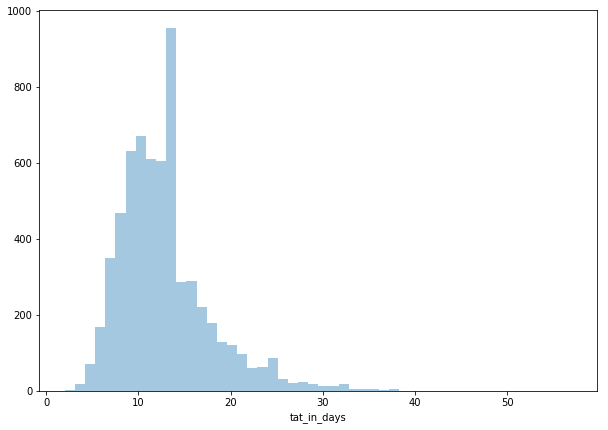

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(data.tat_in_days, kde=False, bins=50)

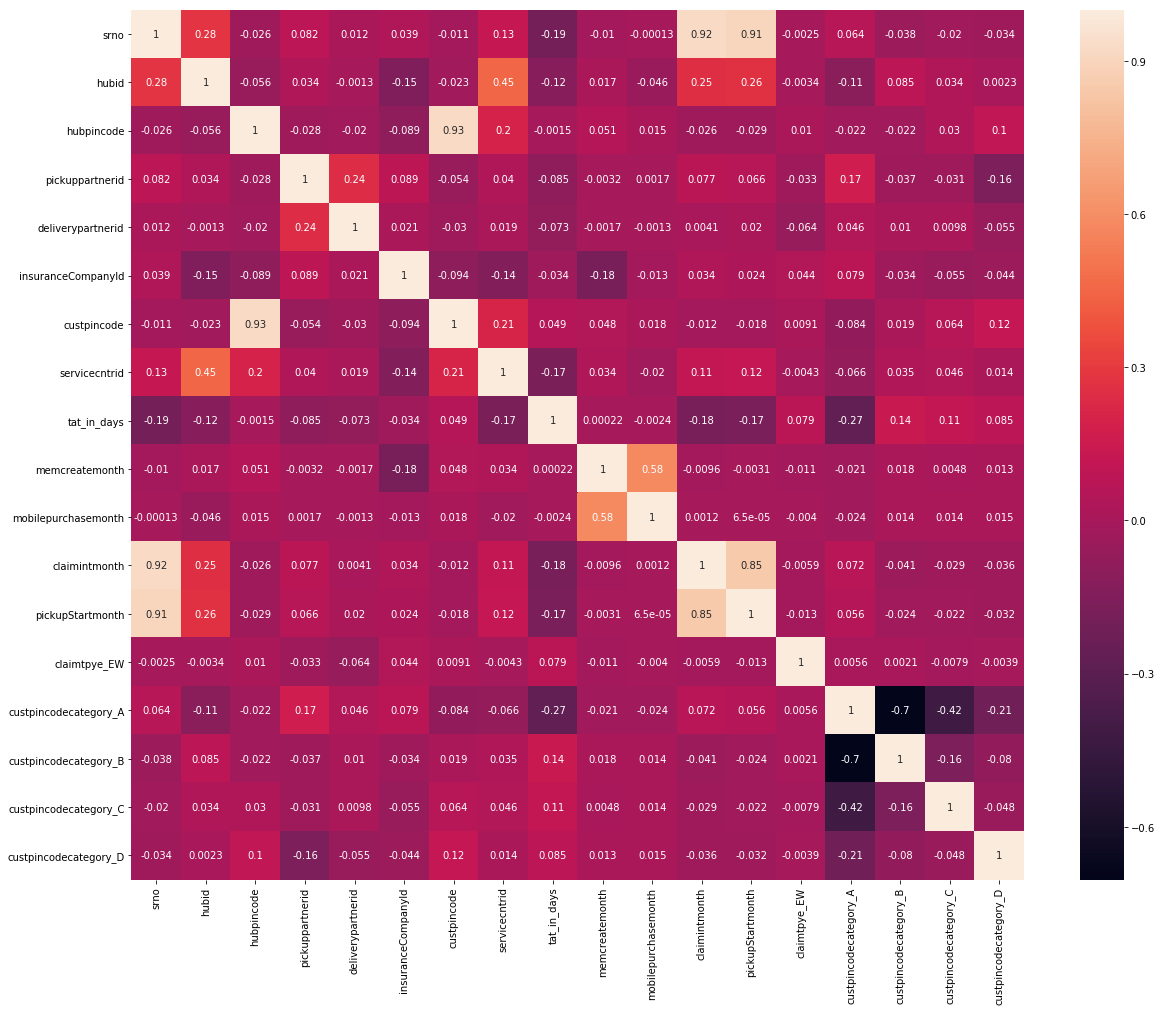

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot=True)

# Model Training

In [19]:
X = data.drop(columns=['srno','tat_in_days', 'mobmake'])
y = data['tat_in_days']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

4.498563939844914


In [23]:
cdf = pd.DataFrame(lr.coef_, X.columns)

## Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, y_train)
dtreg_pred = dtreg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, dtreg_pred)))

5.930396276809839


## Gradient Boosting Regression

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train, y_train)
gb_pred = gbreg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, gb_pred)))

C:\Users\AA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


4.169095721599519


In [26]:
final_pred = gbreg.predict(XnewTest)

# Plot of Turn Around Time predictions

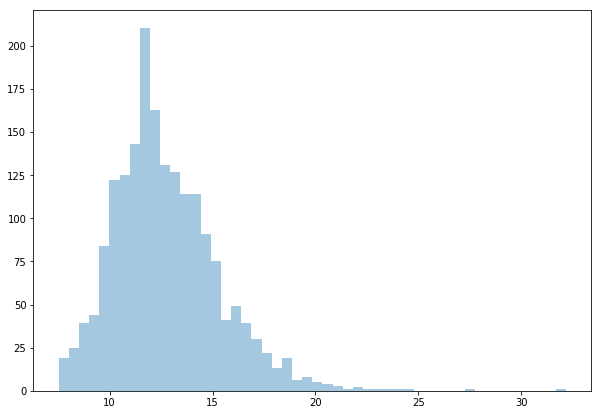

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(gb_pred, kde=False, bins=50)

In [28]:
Prediction = pd.read_csv('problem_2_test.csv')

In [29]:
new_series = pd.Series(final_pred)

In [30]:
Answer = pd.concat([Prediction, new_series], axis=1)

In [31]:
Answer.rename(columns={0: 'Prediction'}, inplace=True)
Answer.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,Prediction
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,11.892338
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,15.388483
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,12.821179
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,14.090055
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,15.243663


In [32]:
export_csv = Answer.to_csv (r'C:\Users\AA\Desktop\Assignment 3\Assignment 2\problem_2\answer2.csv', index = None, header=True)